# Lasso Regression using Coordinate Descent #

A fan is rotating with a constant angular velocity, $\omega_o=2\pi(R+2)$ radians/s, where R is the last digit of your roll number. You are measuring the angle of the fan, $\theta(t)=\omega_ot$ ; $\theta(t) ∈ [0,2\pi)$, with respect to time t, sampled at a frequency Fs=128Hz for a duration of 1s.

The last digit of my roll number is R=1
thus $\omega_o$=2$\pi$ * 3 radians/s

In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [0]:
def generate_theta(omega,n):

    theta=(omega*n)%(2*np.pi)
    return theta,n



In [0]:
def setlimit(i):
    if i==0:
        plt.ylim(-5,10)
    elif i==1:
        plt.ylim(-10,10)
    else:
        plt.ylim(-10,20)

In [0]:
def plot_theta(theta,x):

    plt.plot(x,theta,'-o')
    plt.show()

In [0]:
def generate_train_sample(omega,n):
  
    
    np.random.seed(3)
    np.random.shuffle(n)

    
    nts=n[0:10]                      
    nts.sort()
    

    thta,n=generate_theta(omega,nts)     
    return thta,n


In [0]:
def generate_test_samples(omega,n,nts):
    
    
    nst=np.setdiff1d(n,nts)
    np.random.seed(3)
    np.random.shuffle(nst)
    nst=nst[0:50]
    nst.sort()
    test,ntest=generate_theta(omega,nst)
    return test,ntest

In [0]:
def lasso_regression(trains,phi):
    k=0
    weinter=[]
    if not np.isfortran(phi):
        phi=np.asfortranarray(phi) 
    kross=N/2
    n_samples,n_poly=phi.shape
    max_iter=1000
    w=np.zeros(n_poly)
    residual=trains.copy()
    lipscu_c=(np.power(phi,2)).sum(axis=0)  

    while kross>0:
        for t in range(max_iter):
            for i in range(n_poly):
                lamda=k*0.005
                old=w[i]
                data_ground=old+phi[:,i].dot(residual)/lipscu_c[i]
                threshold=lamda/lipscu_c[i]
                w[i]=np.sign(data_ground) * np.maximum(np.abs(data_ground) - threshold, 0.)
                if old!=w[i]:
                    residual+=(old-w[i])*phi[:,i]
        kross=N/2
        weinter=np.resize(weinter,(k+1,len(w)))
        weinter[k]=w
        for i in range(len(w)):
            if w[i]==0:
                kross=kross-1
        k=k+1
    
    return w,weinter,k

In [0]:
def plot_weights(weights,k):
    lamda=0.005*np.arange(k)
    for o in range(N):
        wei=weights[o]
        plt.xlim(0,0.03)
        plt.title('$Weights$ $vs.$ $\lambda$')
        plt.xlabel('$\lambda$')
        plt.ylabel('$Weights$')
        plt.plot(lamda,wei,'-x',label="w {} ".format(o))
        plt.legend(loc='upper right')
        


In [0]:
def plot_testingdata(ntest,ytest,tests):
    plt.title('N=10 ; D=%d testing data'%(N-1))
    plt.xlabel('Values of n')
    plt.ylabel(r"$\theta(n)$")
    plt.plot(ntest*Fs,ytest,'o',label='predicted')
    plt.plot(ntest*Fs,tests,'-.',label='actual')
    plt.legend(loc='upper left')
    plt.show()

In [0]:
def plot_trainingdata(ntrain,ytrain,trainsample):
    plt.title('N=10 ; D=%d training data'%(N-1))
    plt.xlabel('Values of n')
    plt.ylabel(r"$\theta(n)$")
    plt.plot(ntrain*Fs,ytrain,'o',label='predicted')
    plt.plot(ntrain*Fs,trainsample,'-.',label='actual')
    plt.legend(loc='upper left')
    plt.show()

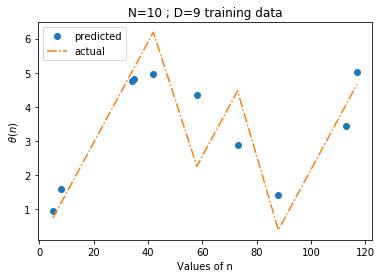

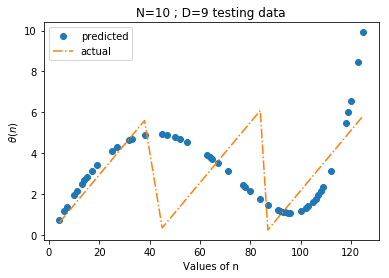

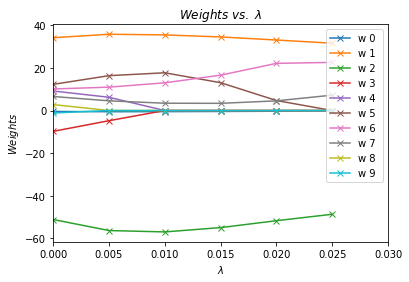

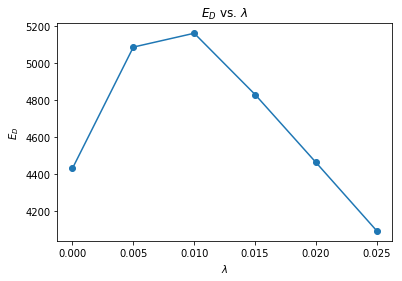

In [24]:
omega=2*np.pi*3
Fs=128
Ts=1/Fs
n=np.arange(Fs)
sample=n*Ts
x=np.arange(Fs)
theta,n=generate_theta(omega,sample)
trainsample,ntrain=generate_train_sample(omega,n)
testsample,ntest=generate_test_samples(omega,sample,ntrain)
swon=[]

M=np.arange(10)
N=len(M)
NTR=np.reshape(ntrain,(len(ntrain),1))
trains=np.reshape(trainsample,(len(trainsample),))
tests=np.reshape(testsample,(len(testsample),1))
phi=np.power(NTR,M)

w,old_w,k=lasso_regression(trains,phi)

w_lasso=np.reshape(w,(len(w),1))
NTST=np.reshape(ntest,(len(ntest),1))
phitest=np.power(NTST,M)
ytest=np.dot(phitest,w_lasso)
weights=old_w.T

ytrain=np.dot(phi,w)

plot_trainingdata(ntrain,ytrain,trainsample)
plot_testingdata(ntest,ytest,tests)
plot_weights(weights,k)
    

error_d=tests-ytest
erro_po=np.power(error_d,2)
errorsum=sum(erro_po)

for bee in range(k):
    
    woror=old_w[bee]
    swon=np.resize(swon,(k,1))
    z=np.sum(np.power(abs(woror),2))+errorsum
    swon[bee]=z
error=swon.T
long=error.flatten()

lam=0.005*(np.arange(k))
plt.figure()
plt.title('$E_D$ vs. $\lambda$')
plt.ylabel('$E_D$')
plt.xlabel('$\lambda$')
plt.plot(lam,long,'-o')
plt.show()
    
